In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math

The goal of this KNN Algorithm is to predict whether stores have more markdowns and sales on holidays v.s not on holidays

In [70]:
df = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565963,2012-08-17,16,62.07,3.545,408.10,NaN,1.10,870.38,604.80,6.061,False,27,752.11
565964,2012-08-24,16,61.44,3.558,1556.47,16.00,3.34,869.05,1691.12,6.061,False,27,703.94
565965,2012-08-31,16,64.19,3.556,8702.40,NaN,35.78,3576.08,4493.67,6.061,False,27,614.79
565966,2012-09-14,16,56.69,3.659,5323.84,NaN,9.30,1307.03,4474.84,6.061,False,27,898.63


In [71]:
# Dropping the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Dropping the null rows
df = df.dropna()
df.head()
#Getting rid of space on FALSE_POSITIVES
df.replace(to_replace ="FALSE POSITIVE", 
                 value ="FALSE_POSITIVE",
          inplace=True)

In [72]:
#drop other unnecesary columns 
df.drop(inplace= True,columns=[ 'fuel_price','unemployment','dept'])

In [42]:
#use conditional to locate all rows after November 4th 2011
new_df = df.loc[df["sale_date"]> "2011-11-04" ]
new_df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42
63,2011-11-18,16,31.73,2089.46,154.21,3.55,830.60,4425.07,False,279.22
64,2011-11-25,16,31.39,90.28,126.47,34754.69,24.64,1560.32,True,349.09
66,2011-12-23,16,20.79,485.00,0.18,475.60,16.20,960.85,False,575.78
67,2011-12-30,16,23.91,921.67,11778.68,101.87,272.51,1673.25,True,685.46
...,...,...,...,...,...,...,...,...,...,...
565957,2012-06-15,16,65.36,7027.33,141.80,125.91,642.76,1980.96,False,909.28
565958,2012-06-22,16,70.41,1291.33,201.00,0.27,696.47,1682.13,False,929.01
565960,2012-07-13,16,70.29,2375.53,17.90,2.07,983.30,1834.23,False,952.86
565961,2012-07-20,16,68.43,1115.42,105.35,4.69,196.54,948.69,False,799.20


In [43]:
# Getting average of markdowns1-5 DataFrame rows (selected by index labels)
new_df['markdownmean']= new_df[[ 'markdown1', 'markdown2', 'markdown3','markdown4','markdown5'] ].mean(axis=1)

In [88]:
#Selecting wanted columns
freshy= new_df.loc[:,['markdownmean','weekly_sales','isholiday','store','temperature']] 
freshy.head()

,markdownmean,weekly_sales,isholiday,store,temperature
62,2697.742,468.42,False,16,29.56
63,1500.578,279.22,False,16,31.73
64,7311.280,349.09,True,16,31.39
66,387.566,575.78,False,16,20.79
67,2949.596,685.46,True,16,23.91


In [89]:
y = freshy["isholiday"]


In [90]:
freshy['isholiday'].value_counts()

False    139826
True      10090
Name: isholiday, dtype: int64

In [91]:
X = freshy.drop("isholiday", axis=1)
X.head()

,markdownmean,weekly_sales,store,temperature
62,2697.742,468.42,16,29.56
63,1500.578,279.22,16,31.73
64,7311.280,349.09,16,31.39
66,387.566,575.78,16,20.79
67,2949.596,685.46,16,23.91


In [92]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [93]:
# Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [94]:
#Transforming the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [95]:
#Checking if y_test is odd
math.sqrt(len(y_test))
#Since its odd no need to use classifier 

193.59493795035036

In [96]:
#Defining model
classifier= KNeighborsClassifier(n_neighbors= 193, p=2, metric= 'euclidean')

In [97]:
#Fitting data train in the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=193, p=2,
                     weights='uniform')

In [98]:
#Predicting the test set results
y_pred= classifier.predict(X_test)

In [99]:
#Evaluating model
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[34552   365]
 [ 2112   450]]
0.26650873556411014


In [100]:
print(accuracy_score(y_test, y_pred))

0.9339096560740682


According to the confusion matrix we can see that 34552 of predicted sales and markdowns are not on holidays and 450 are on holidays.
Furthermore, there are 365 sales and markdowns on holidays and 2112 sales and markdowns not on holidays that are incorrect. 
The f_1 score is at a 27% accuracy which is very low. 
However, the accuracy score is at 93% which is pretty high. 

In [101]:
 # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.999
k: 3, Train/Test Score: 0.999/0.997
k: 5, Train/Test Score: 0.998/0.997
k: 7, Train/Test Score: 0.997/0.995
k: 9, Train/Test Score: 0.997/0.995
k: 11, Train/Test Score: 0.996/0.994
k: 13, Train/Test Score: 0.995/0.994
k: 15, Train/Test Score: 0.995/0.993
k: 17, Train/Test Score: 0.994/0.993
k: 19, Train/Test Score: 0.994/0.992


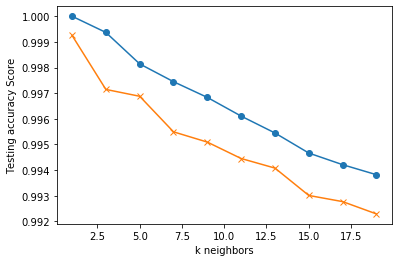

In [102]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [103]:
 # Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.994
